# Bank - Attritionanalysis

#### Daten einlesen

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "data/"
dataframes = []
for csv_file in os.listdir(path):
    if csv_file.endswith(".csv"):
        dataframes.append(pd.read_csv(path + csv_file, sep="|"))

df = pd.concat(dataframes, ignore_index=True)

print(df.shape)

(10006, 13)


### Kontrolle des zusammengefügten DataFrames

- Summe aller Zeilen der csv-Dateien
- Spaltenanzahl (Features)
- Ausgabe der Features

In [3]:
path = "data/"
sum_rows = 0
for csv_file in os.listdir(path):
    df = pd.read_csv(path + csv_file, sep="|")
    sum_rows += int(df.shape[0])

print(f"Summe der Zeilen aller csv-Dateien: {sum_rows}\nAnzahl der Features (Spalten): {df.shape[1]}\n{df.dtypes}")

Summe der Zeilen aller csv-Dateien: 10006
Anzahl der Features (Spalten): 13
num_kids             object
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


### Erste Identifikation von Datenproblemen

#####Analyse der Spalten mit dem Datentyp object (string)

In [4]:
def get_unique_objects():
    features = df.columns.values
    for feature in features:
        if df[feature].values.dtype not in [int, float]:
            print(f"{df[feature].name}\n{df[feature].unique()}")
          
#get_unique_objects()
df["gender"] = df["gender"].str.lower()
df["gender"] = df["gender"].replace("f", "female").replace("m", "male")
get_unique_objects()

num_kids
['-']
country
['Germany' 'Spain' 'France']
gender
['male' 'female']


##### Analyse der numerischen Spalten

Min Age: 18
Max Age: 83
Avg Age: 38.85


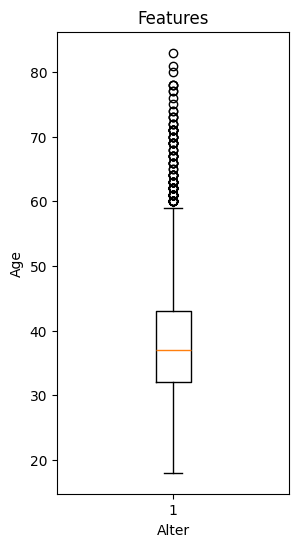

In [5]:
fig, ax = plt.subplots(figsize=(3, 6))

ax.set_title("Features")
ax.set_ylabel("Age")
ax.set_xlabel("Alter")
ax.boxplot(df["age"])
print(f"Min Age: {df["age"].min()}\nMax Age: {df['age'].max()}\nAvg Age: {round(df['age'].mean(), 2)}")